In [2]:
# Web scraping, pickle imports
import requests
from bs4 import BeautifulSoup
import pickle

# Scrapes transcript data from scrapsfromtheloft.com
def url_to_transcript(url):
    '''Returns transcript data specifically from scrapsfromtheloft.com.'''
    page = requests.get(url).text
    soup = BeautifulSoup(page, "lxml")
    text = [p.text for p in soup.find(class_="post-content").find_all('p')]
    print(url)
    return text

# URLs of transcripts in scope
urls = ['http://scrapsfromtheloft.com/2017/05/06/louis-ck-oh-my-god-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/11/dave-chappelle-age-spin-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/15/ricky-gervais-humanity-transcript/',
        'http://scrapsfromtheloft.com/2017/08/07/bo-burnham-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/05/24/bill-burr-im-sorry-feel-way-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/04/21/jim-jefferies-bare-2014-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/02/john-mulaney-comeback-kid-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2017/10/21/hasan-minhaj-homecoming-king-2017-full-transcript/',
        'http://scrapsfromtheloft.com/2017/09/19/ali-wong-baby-cobra-2016-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/03/anthony-jeselnik-thoughts-prayers-2015-full-transcript/',
        'http://scrapsfromtheloft.com/2018/03/03/mike-birbiglia-my-girlfriends-boyfriend-2013-full-transcript/',
        'http://scrapsfromtheloft.com/2017/08/19/joe-rogan-triggered-2016-full-transcript/']

# Comedian names
comedians = ['louis', 'dave', 'ricky', 'bo', 'bill', 'jim', 'john', 'hasan', 'ali', 'anthony', 'mike', 'joe']

In [ ]:
# # Pickle files for later use

# # Make a new directory to hold the text files
# !mkdir transcripts

# for i, c in enumerate(comedians):
#     with open("transcripts/" + c + ".txt", "wb") as file:
#         pickle.dump(transcripts[i], file)

In [3]:
# Load pickled files
data = {}
for i, c in enumerate(comedians):
    with open("transcripts/" + c + ".txt", "rb") as file:
        data[c] = pickle.load(file)

In [12]:
def combine_text(list_of_text):
    combined_text = ' '.join(list_of_text)
    return combined_text

data_combined = {key: [combine_text(value)] for key, value in data.items()}

In [15]:
for key, value in data_combined.items():
    print(key)

louis
dave
ricky
bo
bill
jim
john
hasan
ali
anthony
mike
joe


In [16]:
import pandas as pd
pd.set_option('max_colwidth', 150)

df = pd.DataFrame.from_dict(data_combined).transpose()
df.columns = ['transcripts']
df = df.sort_index()
df.head()

,transcripts
ali,"Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have ..."
anthony,"Thank you. Thank you. Thank you, San Francisco. Thank you so much. So good to be here. People were surprised when I told ’em I was gonna tape my s..."
bill,"[cheers and applause] All right, thank you! Thank you very much! Thank you. Thank you. Thank you. How are you? What’s going on? Thank you. It’s a ..."
bo,Bo What? Old MacDonald had a farm E I E I O And on that farm he had a pig E I E I O Here a snort There a Old MacDonald had a farm E I E I O [Appla...
dave,"This is Dave. He tells dirty jokes for a living. That stare is where most of his hard work happens. It signifies a profound train of thought, the ..."


In [22]:
df.transcripts.loc['ali'][:220]

'Ladies and gentlemen, please welcome to the stage: Ali Wong! Hi. Hello! Welcome! Thank you! Thank you for coming. Hello! Hello. We are gonna have to get this shit over with, ’cause I have to pee in, like, ten minutes. Bu'

### Clean the data
* lowecase
* ponctuation
* stop words

In [44]:
import re
import string

def clean_text_round1(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w', '', text)
    return text

df_clean = pd.DataFrame(
    df.transcripts.apply(lambda x: clean_text_round1(x))
)

In [45]:
df_clean.head()

,transcripts
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have ...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told ’em i was gonna tape my s...
bill,all right thank you thank you very much thank you thank you thank you how are you what’s going on thank you it’s a pleasure to be here i...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this ...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the ...


In [46]:
def clean_text_round2(text):
    text = re.sub('[''’“”_]', '', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\d', '', text)
    return text

df_clean = pd.DataFrame(
    df_clean.transcripts.apply(lambda x: clean_text_round2(x))
)
df_clean

,transcripts
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have ...
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my sp...
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in ...
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this ...
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the ...
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was...
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you bost...
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phon...
john,all right petunia wish me luck out there you will die on august h thats pretty good all right hello hello chicago nice to see you again...
louis,intro fade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agre...


In [47]:
from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english')
data_cv = cv.fit_transform(df_clean.transcripts)
data_dtn = pd.DataFrame(data_cv.toarray(),
                        columns=cv.get_feature_names())
data_dtn.index = df_clean.index
data_dtn

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


### Data exploration

In [50]:
data = data_dtn.transpose()
data

,ali,anthony,bill,bo,dave,hasan,jim,joe,john,louis,mike,ricky
aaaaah,0,0,1,0,0,0,0,0,0,0,0,0
aaaaahhhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaaauuugghhhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaaahhhhh,0,0,0,1,0,0,0,0,0,0,0,0
aaah,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
zombie,1,0,1,0,0,0,0,0,0,0,0,0
zombies,0,0,1,0,0,0,0,0,0,0,0,0
zoning,0,0,1,0,0,0,0,0,0,0,0,0
zoo,0,0,0,0,0,0,0,0,0,0,0,1


In [55]:
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c] = list(zip(top.index, top.values))
    
top_dict

{'ali': [('like', 126),
  ('im', 74),
  ('know', 68),
  ('just', 64),
  ('dont', 61),
  ('thats', 34),
  ('shit', 34),
  ('youre', 31),
  ('gonna', 28),
  ('ok', 26),
  ('lot', 24),
  ('wanna', 21),
  ('gotta', 21),
  ('oh', 21),
  ('husband', 20),
  ('got', 19),
  ('right', 19),
  ('time', 19),
  ('cause', 18),
  ('day', 17),
  ('women', 17),
  ('people', 16),
  ('pregnant', 15),
  ('hes', 14),
  ('half', 14),
  ('god', 14),
  ('asian', 14),
  ('need', 14),
  ('yeah', 13),
  ('tell', 13)],
 'anthony': [('im', 60),
  ('like', 50),
  ('know', 39),
  ('dont', 38),
  ('joke', 34),
  ('got', 34),
  ('said', 31),
  ('thats', 31),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('just', 26),
  ('guys', 23),
  ('people', 22),
  ('tell', 19),
  ('youre', 19),
  ('think', 18),
  ('right', 18),
  ('grandma', 18),
  ('yeah', 17),
  ('thing', 17),
  ('time', 17),
  ('school', 16),
  ('did', 16),
  ('jokes', 16),
  ('good', 16),
  ('gonna', 15),
  ('okay', 15),
  ('baby', 15),
  ('ive', 15)],
 '

In [58]:
for comedian, top_words in top_dict.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[:15]]))
    print('---')

ali
like, im, know, just, dont, thats, shit, youre, gonna, ok, lot, wanna, gotta, oh, husband
---
anthony
im, like, know, dont, joke, got, said, thats, anthony, day, say, just, guys, people, tell
---
bill
like, just, right, im, know, dont, gonna, got, fucking, yeah, shit, youre, thats, dude, fuck
---
bo
know, like, think, love, im, bo, just, stuff, repeat, dont, yeah, want, right, cos, fucking
---
dave
like, know, ah, said, just, im, shit, people, didnt, dont, time, fuck, thats, fucking, black
---
hasan
like, im, know, dont, dad, youre, just, going, thats, want, got, love, shes, hasan, right
---
jim
like, im, dont, right, fucking, went, know, just, youre, people, thats, oh, day, going, think
---
joe
like, people, just, dont, fucking, im, fuck, thats, gonna, theyre, know, youre, think, shit, got
---
john
like, know, just, dont, said, clinton, im, old, thats, right, youre, little, hey, time, got
---
louis
like, just, know, dont, im, thats, youre, life, people, thing, hes, gonna, cause, t

In [61]:
from collections import Counter
words = []
for comedian in data.columns:
    top = [word for (word, count) in top_dict[comedian]]
    for t in top:
        words.append(t)
words[:10]

['like', 'im', 'know', 'just', 'dont', 'thats', 'shit', 'youre', 'gonna', 'ok']

In [62]:
Counter(words).most_common()

[('like', 12),
 ('im', 12),
 ('know', 12),
 ('just', 12),
 ('dont', 12),
 ('thats', 12),
 ('right', 12),
 ('people', 12),
 ('youre', 11),
 ('got', 10),
 ('gonna', 8),
 ('think', 8),
 ('oh', 7),
 ('time', 7),
 ('yeah', 7),
 ('said', 7),
 ('cause', 6),
 ('hes', 6),
 ('say', 6),
 ('fucking', 6),
 ('shit', 5),
 ('day', 5),
 ('thing', 5),
 ('good', 5),
 ('fuck', 5),
 ('want', 5),
 ('didnt', 5),
 ('going', 5),
 ('theyre', 5),
 ('theres', 5),
 ('really', 5),
 ('did', 4),
 ('ive', 3),
 ('old', 3),
 ('make', 3),
 ('little', 3),
 ('man', 3),
 ('life', 3),
 ('went', 3),
 ('ok', 2),
 ('lot', 2),
 ('gotta', 2),
 ('women', 2),
 ('tell', 2),
 ('joke', 2),
 ('guys', 2),
 ('dude', 2),
 ('guy', 2),
 ('come', 2),
 ('love', 2),
 ('dad', 2),
 ('mom', 2),
 ('hey', 2),
 ('white', 2),
 ('goes', 2),
 ('kids', 2),
 ('real', 2),
 ('id', 2),
 ('wanna', 1),
 ('husband', 1),
 ('pregnant', 1),
 ('half', 1),
 ('god', 1),
 ('asian', 1),
 ('need', 1),
 ('anthony', 1),
 ('grandma', 1),
 ('school', 1),
 ('jokes', 1),
 ('

In [63]:
add_stop_words = [word for word, count in Counter(words).most_common()
                 if count > 6]
print(add_stop_words)

['like', 'im', 'know', 'just', 'dont', 'thats', 'right', 'people', 'youre', 'got', 'gonna', 'think', 'oh', 'time', 'yeah', 'said']


In [80]:
# Add new stop words
from sklearn.feature_extraction import text 
stop_words = text.ENGLISH_STOP_WORDS.union(add_stop_words)

# Recreate document-term matrix
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(df_clean.transcripts)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = df_clean.index

In [81]:
data_stop

,aaaaah,aaaaahhhhhhh,aaaaauuugghhhhhh,aaaahhhhh,aaah,aah,abc,abcs,ability,abject,...,zee,zen,zeppelin,zero,zillion,zombie,zombies,zoning,zoo,éclair
ali,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
anthony,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
bill,1,0,0,0,0,0,0,1,0,0,...,0,0,0,1,1,1,1,1,0,0
bo,0,1,1,1,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
dave,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
hasan,0,0,0,0,0,0,0,0,0,0,...,2,1,0,1,0,0,0,0,0,0
jim,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
joe,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
john,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
louis,0,0,0,0,0,3,0,0,0,0,...,0,0,0,2,0,0,0,0,0,0


In [82]:
top_dict_update = {}
data_stop = data_stop.transpose()
for c in data_stop.columns:
    top = data_stop[c].sort_values(ascending=False).head(30)
    top_dict_update[c] = list(zip(top.index, top.values))
    
top_dict_update

{'ali': [('shit', 34),
  ('ok', 26),
  ('lot', 24),
  ('gotta', 21),
  ('wanna', 21),
  ('husband', 20),
  ('cause', 18),
  ('women', 17),
  ('day', 17),
  ('pregnant', 15),
  ('hes', 14),
  ('need', 14),
  ('god', 14),
  ('half', 14),
  ('asian', 14),
  ('tell', 13),
  ('white', 12),
  ('really', 12),
  ('ass', 12),
  ('work', 12),
  ('dude', 12),
  ('theyre', 12),
  ('uh', 11),
  ('look', 11),
  ('want', 11),
  ('fuck', 11),
  ('doo', 10),
  ('feel', 10),
  ('make', 10),
  ('anymore', 10)],
 'anthony': [('joke', 34),
  ('anthony', 27),
  ('day', 26),
  ('say', 26),
  ('guys', 23),
  ('tell', 19),
  ('grandma', 18),
  ('thing', 17),
  ('jokes', 16),
  ('did', 16),
  ('good', 16),
  ('school', 16),
  ('baby', 15),
  ('okay', 15),
  ('ive', 15),
  ('shark', 14),
  ('hate', 14),
  ('didnt', 14),
  ('family', 14),
  ('mad', 14),
  ('lot', 13),
  ('new', 13),
  ('things', 12),
  ('come', 12),
  ('money', 12),
  ('dad', 12),
  ('san', 11),
  ('little', 11),
  ('mom', 11),
  ('year', 11)],
 

In [83]:
for comedian, top_words in top_dict_update.items():
    print(comedian)
    print(', '.join([word for word, count in top_words[:15]]))
    print('---')

ali
shit, ok, lot, gotta, wanna, husband, cause, women, day, pregnant, hes, need, god, half, asian
---
anthony
joke, anthony, day, say, guys, tell, grandma, thing, jokes, did, good, school, baby, okay, ive
---
bill
fucking, shit, dude, fuck, want, did, hes, guy, didnt, old, make, come, thing, going, theyre
---
bo
love, bo, stuff, repeat, want, cos, eye, fucking, contact, prolonged, um, little, sluts, man, good
---
dave
ah, shit, didnt, fuck, fucking, black, man, good, nigga, gay, lot, hes, did, oj, come
---
hasan
dad, going, want, love, shes, hasan, say, life, mom, hey, did, look, brown, white, parents
---
jim
fucking, went, day, going, fuck, thing, goes, guns, theyre, good, ive, women, cause, theres, want
---
joe
fucking, fuck, theyre, shit, theres, man, house, kids, white, cause, say, real, life, really, going
---
john
clinton, old, little, hey, mom, cause, say, day, way, cow, really, wife, went, real, dad
---
louis
life, thing, hes, theres, cause, shit, good, tit, old, theyre, reall

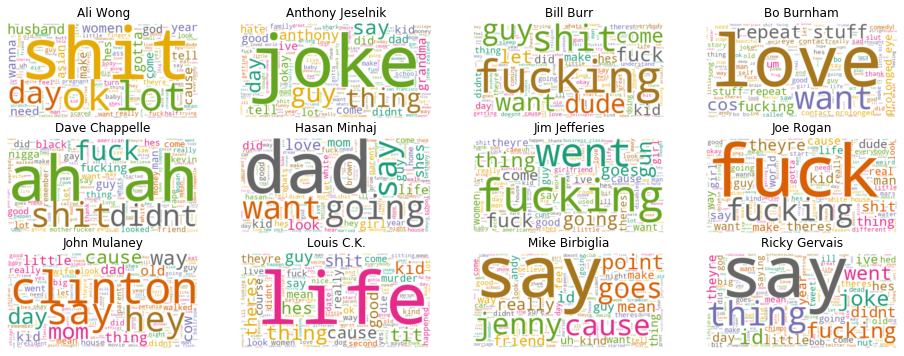

In [91]:
from wordcloud import WordCloud
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
# Reset the output dimensions
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [16, 6]

full_names = ['Ali Wong', 'Anthony Jeselnik', 'Bill Burr', 'Bo Burnham', 'Dave Chappelle', 'Hasan Minhaj',
              'Jim Jefferies', 'Joe Rogan', 'John Mulaney', 'Louis C.K.', 'Mike Birbiglia', 'Ricky Gervais']

# Create subplots for each comedian
for index, comedian in enumerate(data_stop.columns):
    wc.generate(df_clean.transcripts[comedian])
    
    plt.subplot(3, 4, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(full_names[index])
    
plt.show()

In [106]:
unique_list = []
for comedian in data.columns:
    uniques = data[data[comedian] > 0].count()[comedian]
    #print(uniques)
    unique_list.append(uniques)
    
data_words = pd.DataFrame(list(zip(full_names, unique_list)),
                          columns=['comedian', 'unique_words'])
data_unique_sort = data_words.sort_values(by='unique_words')
data_unique_sort

,comedian,unique_words
1,Anthony Jeselnik,973
9,Louis C.K.,1072
3,Bo Burnham,1275
6,Jim Jefferies,1312
0,Ali Wong,1322
4,Dave Chappelle,1382
8,John Mulaney,1386
7,Joe Rogan,1427
10,Mike Birbiglia,1481
5,Hasan Minhaj,1559


In [111]:
total_list = []
for comedian in data.columns:
    totals = sum(data[comedian])
    total_list.append(totals)
    
run_times = [60, 59, 80, 60, 67, 73, 77,
            63, 62, 58, 76, 79]

data_words['total_words'] = total_list
data_words['run_times'] = run_times
data_words['words_per_minute'] = data_words['total_words'] / data_words['run_times']

data_sort = data_words.sort_values(by='words_per_minute')
data_sort

,comedian,unique_words,total_words,run_times,words_per_minute
1,Anthony Jeselnik,973,2911,59,49.338983
3,Bo Burnham,1275,3186,60,53.100000
0,Ali Wong,1322,3320,60,55.333333
9,Louis C.K.,1072,3359,58,57.913793
4,Dave Chappelle,1382,4153,67,61.985075
6,Jim Jefferies,1312,4777,77,62.038961
10,Mike Birbiglia,1481,4763,76,62.671053
11,Ricky Gervais,1629,4989,79,63.151899
8,John Mulaney,1386,4035,62,65.080645
5,Hasan Minhaj,1559,4808,73,65.863014


In [112]:
most_common = Counter(words).most_common()
print(most_common)

[('like', 12), ('im', 12), ('know', 12), ('just', 12), ('dont', 12), ('thats', 12), ('right', 12), ('people', 12), ('youre', 11), ('got', 10), ('gonna', 8), ('think', 8), ('oh', 7), ('time', 7), ('yeah', 7), ('said', 7), ('cause', 6), ('hes', 6), ('say', 6), ('fucking', 6), ('shit', 5), ('day', 5), ('thing', 5), ('good', 5), ('fuck', 5), ('want', 5), ('didnt', 5), ('going', 5), ('theyre', 5), ('theres', 5), ('really', 5), ('did', 4), ('ive', 3), ('old', 3), ('make', 3), ('little', 3), ('man', 3), ('life', 3), ('went', 3), ('ok', 2), ('lot', 2), ('gotta', 2), ('women', 2), ('tell', 2), ('joke', 2), ('guys', 2), ('dude', 2), ('guy', 2), ('come', 2), ('love', 2), ('dad', 2), ('mom', 2), ('hey', 2), ('white', 2), ('goes', 2), ('kids', 2), ('real', 2), ('id', 2), ('wanna', 1), ('husband', 1), ('pregnant', 1), ('half', 1), ('god', 1), ('asian', 1), ('need', 1), ('anthony', 1), ('grandma', 1), ('school', 1), ('jokes', 1), ('okay', 1), ('baby', 1), ('let', 1), ('bo', 1), ('stuff', 1), ('repeat

In [113]:
# Let's isolate just these bad words
data_bad_words = data.transpose()[['fucking', 'fuck', 'shit']]
data_profanity = pd.concat([data_bad_words.fucking + data_bad_words.fuck, data_bad_words.shit], axis=1)
data_profanity.columns = ['f_word', 's_word']
data_profanity

,f_word,s_word
ali,16,34
anthony,15,11
bill,107,63
bo,37,6
dave,65,46
hasan,25,15
jim,116,21
joe,135,40
john,4,6
louis,21,26


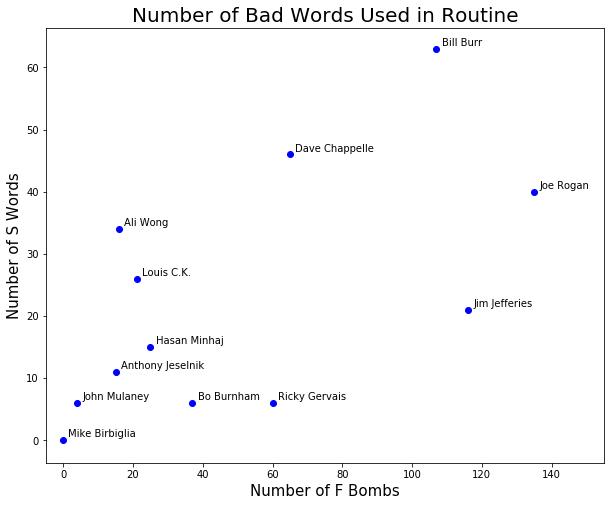

In [114]:
plt.rcParams['figure.figsize'] = [10, 8]

for i, comedian in enumerate(data_profanity.index):
    x = data_profanity.f_word.loc[comedian]
    y = data_profanity.s_word.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+1.5, y+0.5, full_names[i], fontsize=10)
    plt.xlim(-5, 155) 
    
plt.title('Number of Bad Words Used in Routine', fontsize=20)
plt.xlabel('Number of F Bombs', fontsize=15)
plt.ylabel('Number of S Words', fontsize=15)

plt.show()

## Sentiment Analysis

In [122]:
from textblob import TextBlob
TextBlob("I hate PyOhio").sentiment
TextBlob("I love PyOhio").sentiment
TextBlob("I am at home").sentiment
TextBlob("I am sad").sentiment

Sentiment(polarity=-0.5, subjectivity=1.0)

In [124]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df_clean['polarity'] = df_clean['transcripts'].apply(pol)
df_clean['subjectivity'] = df_clean['transcripts'].apply(sub)
df_clean

,transcripts,polarity,subjectivity
ali,ladies and gentlemen please welcome to the stage ali wong hi hello welcome thank you thank you for coming hello hello we are gonna have ...,0.061140,0.470334
anthony,thank you thank you thank you san francisco thank you so much so good to be here people were surprised when i told em i was gonna tape my sp...,0.045446,0.562519
bill,all right thank you thank you very much thank you thank you thank you how are you whats going on thank you its a pleasure to be here in ...,0.008413,0.540977
bo,bo what old macdonald had a farm e i e i o and on that farm he had a pig e i e i o here a snort there a old macdonald had a farm e i e i o this ...,0.073250,0.557270
dave,this is dave he tells dirty jokes for a living that stare is where most of his hard work happens it signifies a profound train of thought the ...,-0.005134,0.513456
hasan,whats up davis whats up im home i had to bring it back here netflix said where do you want to do the special la chicago new york i was...,0.080741,0.462837
jim,ladies and gentlemen please welcome to the stage mr jim jefferies hello sit down sit down sit down sit down sit down thank you bost...,0.040619,0.537662
joe,ladies and gentlemen welcome joe rogan what the fuck is going on san francisco thanks for coming i appreciate it god damn put your phon...,0.006671,0.554369
john,all right petunia wish me luck out there you will die on august h thats pretty good all right hello hello chicago nice to see you again...,0.072634,0.483118
louis,intro fade the music out lets roll hold there lights do the lights thank you thank you very much i appreciate that i dont necessarily agre...,0.052698,0.519013


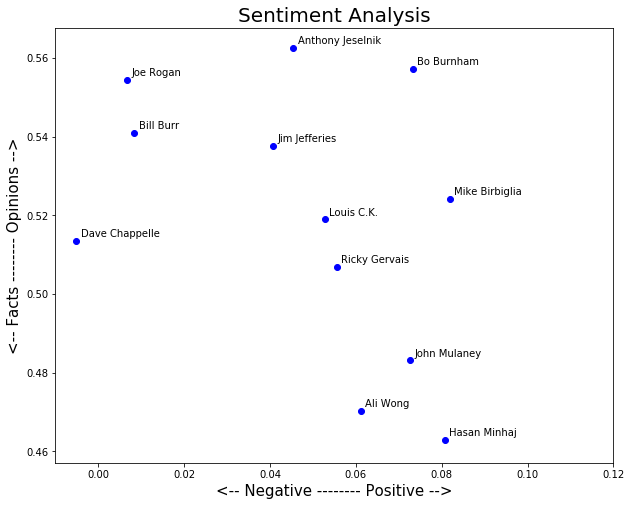

In [126]:
plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(df_clean.index):
    x = df_clean.polarity.loc[comedian]
    y = df_clean.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, full_names[index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [130]:
import math
import numpy as np

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [131]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in df_clean.transcripts:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['ladies and gentlemen  please welcome to the stage  ali wong  hi  hello  welcome  thank you  thank you for coming  hello  hello  we are gonna have to get this shit over with  cause i have to pee in  like  ten minutes  but thank you  everybody  so much for coming  um… its a very exciting day for me  its been a very exciting year for me  i turned  this year  yes  thank you  five people  i appreciate that  uh  i can tell that im getting older  because  now  when i see an  year old girl  my automatic thought… is fuck you  fuck you  i dont even know you  but fuck you  ‘cause im straight up jealous  im jealous  first and foremost  of their metabolism  because  year old girls  they could just eat like shit  and then they take a shit and have a six pack  right  they got that that beautiful inner thigh clearance where they put their feet together and theres that huge gap here with the light of potential just radiating through  and then  when they go to sleep  they just go to sleep  right  the

In [135]:
len(list_pieces)


12

In [136]:

# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.10806401249024201,
  0.05265449735449736,
  0.06945465846068256,
  0.07797760770975055,
  -0.023132902878665595,
  0.09760869822345232,
  0.05532803907803908,
  0.07755385487528343,
  0.012025396825396828,
  0.0674185463659148],
 [0.1225256924647169,
  -0.05080922865013774,
  -0.06294501133786852,
  -0.0014928698752228018,
  0.16377334420812684,
  0.07011031978773913,
  0.0560258358662614,
  0.11371197089947088,
  -0.05070608684245053,
  0.07360080395794678],
 [-0.03729739161804379,
  -0.004845504736809079,
  0.009946067821067812,
  0.003831890331890323,
  -0.03846101814851815,
  0.05842606739665564,
  0.018332232739012376,
  -0.023070436507936512,
  -0.01024027559741847,
  0.09588564213564216],
 [0.18281512605042022,
  -0.025238095238095223,
  -0.02811332127787823,
  0.09200542005420052,
  0.028548602912239273,
  0.02935458480913026,
  -0.047675736961451234,
  -0.007228485799914366,
  0.21720523689273685,
  0.24297843665768187],
 [-0.05073496534764142,
  -0.06697609901835255,
  0.

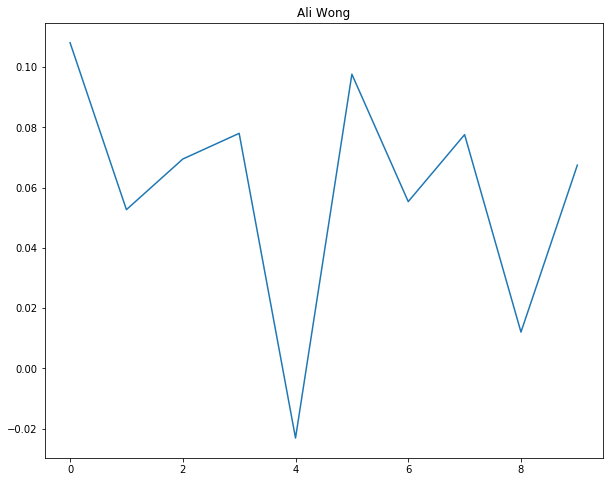

In [138]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])
plt.title(full_names[0])
plt.show()

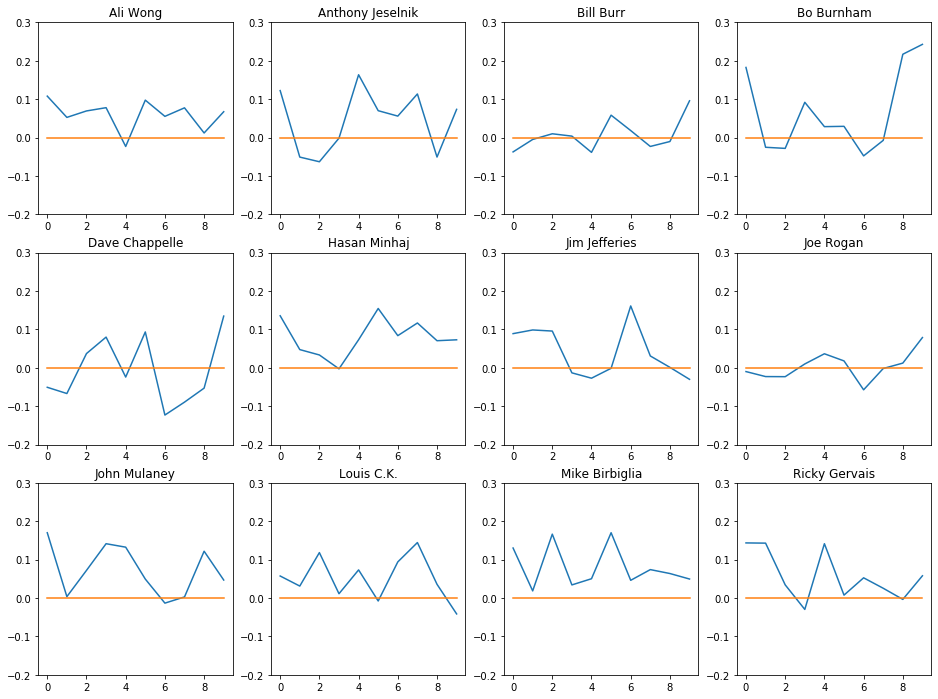

In [140]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(df_clean.index):    
    plt.subplot(3, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(full_names[index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()